# 1. Bibliotecas

In [37]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import glob
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.stem import RSLPStemmer
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('english')

[nltk_data] Downloading package punkt to /Users/andre/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/andre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /Users/andre/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Error loading english: Package 'english' not found in
[nltk_data]     index


False

# 2. Lenda dados dos tweets dos influencer

In [9]:
path = "../data/influencer_tweets/"

csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
df_influencer_tweets   = pd.concat(df_list, ignore_index=True)

# 2.1 Limpeza de dados 
### Removendo dados repetidos

In [10]:
print(df_influencer_tweets.shape) # antes de remover duplicados
df_influencer_tweets = df_influencer_tweets.drop_duplicates().drop_duplicates(subset=['id'])
df_influencer_tweets.shape

(617600, 6)


(605, 6)

# 2.2 Verificando os dados dos 3 influencer

In [27]:
df_influencer_tweets.columns

Index(['id', 'userID', 'created_at', 'full_text', 'favorite_count',
       'retweet_count', 'clean_text'],
      dtype='object')

In [11]:
df_influencer_tweets.head()

,id,userID,created_at,full_text,favorite_count,retweet_count
0,1646187917507801088,Cellbit,2023-04-12 16:25:58+00:00,@spot_desenhador canon,7076,495
1,1644048620897857554,Cellbit,2023-04-06 18:45:10+00:00,@Little_No_One @OrdemParanormal não é essa! \n...,1494,28
2,1638136315270053888,Cellbit,2023-03-21 11:11:47+00:00,o personagem de Ordem que eu mais escrevi sobr...,29593,1594
3,1633689544376688641,Cellbit,2023-03-09 04:41:54+00:00,@gabicattuzzo ?????,10144,139
4,1633526191150751745,Cellbit,2023-03-08 17:52:48+00:00,"@makotices Oi, tudo bem? vi sua postagem e alg...",10337,744


In [12]:
df_influencer_tweets.groupby(("userID")).count()

,id,created_at,full_text,favorite_count,retweet_count
userID,,,,,
BRKsEDU,211,211,211,211,211
Cellbit,179,179,179,179,179
Loiranoob,215,215,215,215,215


### maires valores de contagem de favoritos e retweet

In [26]:
df_influencer_tweets.groupby('userID').agg({'favorite_count': 'max', 'retweet_count': 'max'}).reset_index()

,userID,favorite_count,retweet_count
0,BRKsEDU,55874,3723
1,Cellbit,37759,5028
2,Loiranoob,5717,141


## Quais sao os tweets com maior quantidade de favoritos

In [13]:
top5 = df_influencer_tweets.groupby('userID').apply(lambda x: x.nlargest(5, 'favorite_count')).reset_index(drop=True)
influencers = ['BRKsEDU','Cellbit','Loiranoob']

In [14]:
cols = ["full_text","favorite_count","favorite_count"]
top5[['userID'] + cols ].to_csv('top5_text_favorite_count.csv', index=False)

In [15]:
top5

,id,userID,created_at,full_text,favorite_count,retweet_count
0,1616475289349156868,BRKsEDU,2023-01-20 16:38:36+00:00,https://t.co/DmcPGUR6N7,55874,3723
1,1648402472677912579,BRKsEDU,2023-04-18 19:05:49+00:00,Caro Presidente @LulaOficial - nem todo jogo é...,18831,2052
2,1606098833196208128,BRKsEDU,2022-12-23 01:26:16+00:00,Comemorando 10 anos de casamento ❤️ https://t....,12289,138
3,1649914375560388612,BRKsEDU,2023-04-22 23:13:35+00:00,Eu nunca assinei Twitter Blue e tô aparecendo ...,10062,77
4,1601281883274301442,BRKsEDU,2022-12-09 18:25:26+00:00,"Galera, perdão por torcer pelo meu país de ori...",4312,103
5,1587287860616613888,Cellbit,2022-11-01 03:38:11+00:00,eu cometi\n\neu cometi o crime de amar demais,37759,3859
6,1558560696597716992,Cellbit,2022-08-13 21:06:41+00:00,"ATRASINHO PEQUENO, ta dificil pra colocar os c...",37341,3762
7,1583857678648242176,Cellbit,2022-10-22 16:27:51+00:00,a qualquer momento,37305,4011
8,1517957562142007296,Cellbit,2022-04-23 20:04:19+00:00,eu voltei.,35639,3353
9,1652062724510175235,Cellbit,2023-04-28 21:30:22+00:00,reencontrando um velho amigo https://t.co/NtJy...,34523,4027


## Quais sao os tweets com maior quantidade de retweets

In [16]:
top5_retweet = df_influencer_tweets.groupby('userID').apply(lambda x: x.nlargest(5, 'retweet_count')).reset_index(drop=True)
influencers = ['BRKsEDU','Cellbit','Loiranoob']
cols = ["full_text","favorite_count","retweet_count"]
top5_retweet[['userID'] + cols ].to_csv('top5_text_retweet_count.csv', index=False)

In [17]:
top5_retweet

,id,userID,created_at,full_text,favorite_count,retweet_count
0,1616475289349156868,BRKsEDU,2023-01-20 16:38:36+00:00,https://t.co/DmcPGUR6N7,55874,3723
1,1648402472677912579,BRKsEDU,2023-04-18 19:05:49+00:00,Caro Presidente @LulaOficial - nem todo jogo é...,18831,2052
2,1606098833196208128,BRKsEDU,2022-12-23 01:26:16+00:00,Comemorando 10 anos de casamento ❤️ https://t....,12289,138
3,1648402547600941057,BRKsEDU,2023-04-18 19:06:07+00:00,De fato crianças não devem passar tempo excess...,3784,138
4,1648402852824645638,BRKsEDU,2023-04-18 19:07:20+00:00,E vou aproveitar pra indicar um jogo incrível ...,4144,135
5,1586853748994973696,Cellbit,2022-10-30 22:53:10+00:00,que fim de semana bom,32532,5028
6,1552843607031283712,Cellbit,2022-07-29 02:29:01+00:00,"RPG é uma experiência incrível, e você nunca d...",31016,4642
7,1586370014264926210,Cellbit,2022-10-29 14:50:59+00:00,é hoje!!,25237,4539
8,1552848057347309568,Cellbit,2022-07-29 02:46:42+00:00,você pode reclamar o quanto quiser sobre pesso...,25298,4515
9,1652062724510175235,Cellbit,2023-04-28 21:30:22+00:00,reencontrando um velho amigo https://t.co/NtJy...,34523,4027


# 2.3 Word cloud dos textos sem limpeza

In [18]:
grouped_data = df_influencer_tweets.groupby('userID')

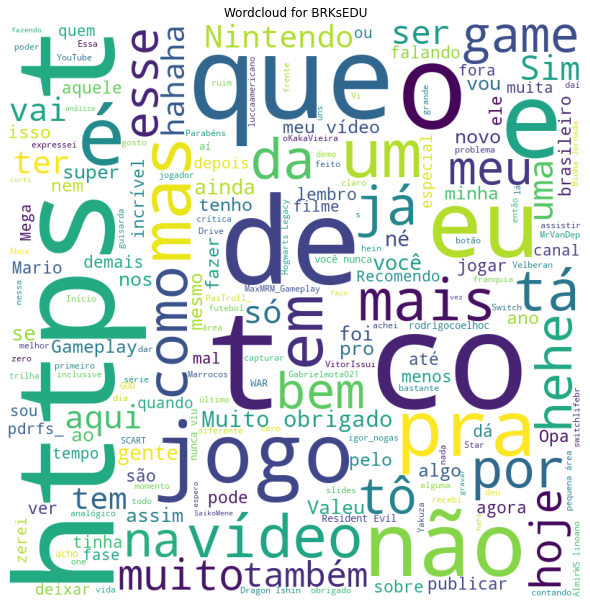

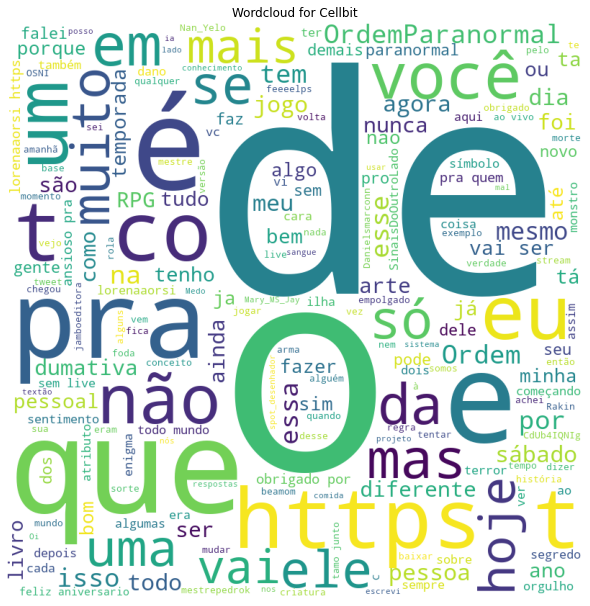

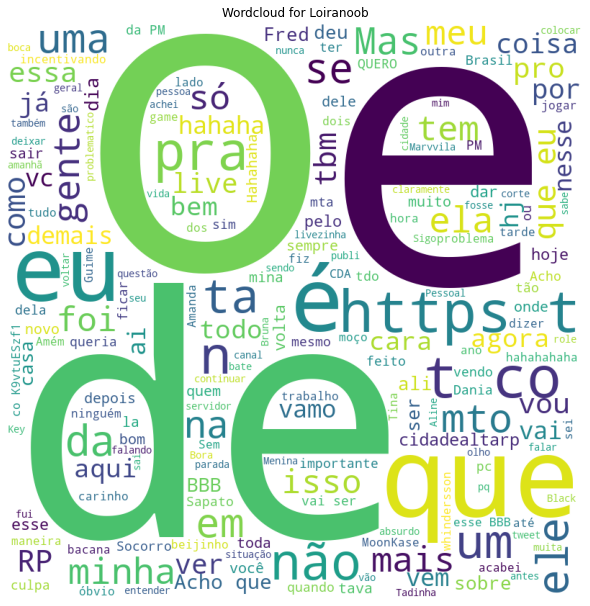

In [19]:
for group_name, group in grouped_data:
    text = ' '.join(group['full_text'].tolist())
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(f"Wordcloud for {group_name}")
    plt.show()


# 2.4 Word Cloud dos textos com limpezas
## aplicadas remocao de stopwords

In [38]:

# Definir a lista de stopwords em português
stop_words = set(stopwords.words('portuguese'))


# Definir o stemmer e o lemmatizer para o idioma português
stemmer = SnowballStemmer('portuguese')
lemmatizer = WordNetLemmatizer()

# Tokenizar o texto e aplicar a limpeza
def preprocess_text(text):

    # Remover URLs
    text = re.sub(r'http\S+', '', text)
    # Remover menções e hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remover caracteres especiais
    text = re.sub(r'[^\w\s]', '', text)
    # Normalizar o text
    text = text.lower()
    text = re.sub(r'\bu\b', 'you', text)
    text = re.sub(r'\br\b', 'are', text)
    text = re.sub(r'\bthx\b|\bty\b', 'thank you', text)

    # Tokenizar o texto
    tokens = word_tokenize(text.lower(), language='portuguese')

    # Remover stopwords
    tokens = [token for token in tokens if token not in stop_words]

    # Realizar stemming
    tokens = [stemmer.stem(token) for token in tokens]

    # Realizar lematização
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Juntar os tokens em uma única string
    clean_text = ' '.join(tokens)

    return clean_text

# Aplicar a limpeza em cada texto da coluna 'full_text'
df_influencer_tweets['clean_text'] = df_influencer_tweets['full_text'].apply(preprocess_text)

In [39]:
df_influencer_tweets[['full_text','clean_text']]

,full_text,clean_text
0,@spot_desenhador canon,canon
1,@Little_No_One @OrdemParanormal não é essa! \n...,adatapçã primeir tempor versã físic webcomic e...
2,o personagem de Ordem que eu mais escrevi sobr...,personag ordem escrev sobr últim 3 ano nunc me...
3,@gabicattuzzo ?????,
4,"@makotices Oi, tudo bem? vi sua postagem e alg...",oi tud bem vi postag algum respost aqu acredit...
...,...,...
2108,Eu nunca assinei Twitter Blue e tô aparecendo ...,nunc assin twitt blu tô aparec verific sent dis
2109,@Sales94331061 @LulaOficial Diminuição de impo...,diminuiçã impost gam diver outr produt servic ...
2110,E vou aproveitar pra indicar um jogo incrível ...,vou aproveit pra indic jog incrível amor tem c...
2111,De fato crianças não devem passar tempo excess...,fat crianc dev pas temp excess gam temp tel ta...


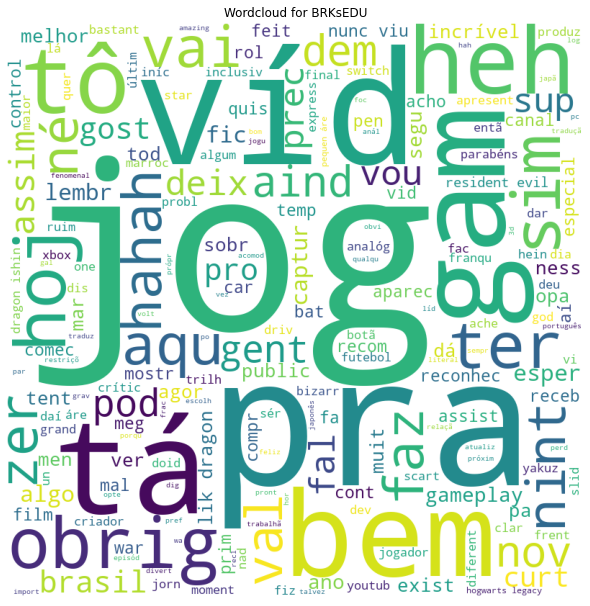

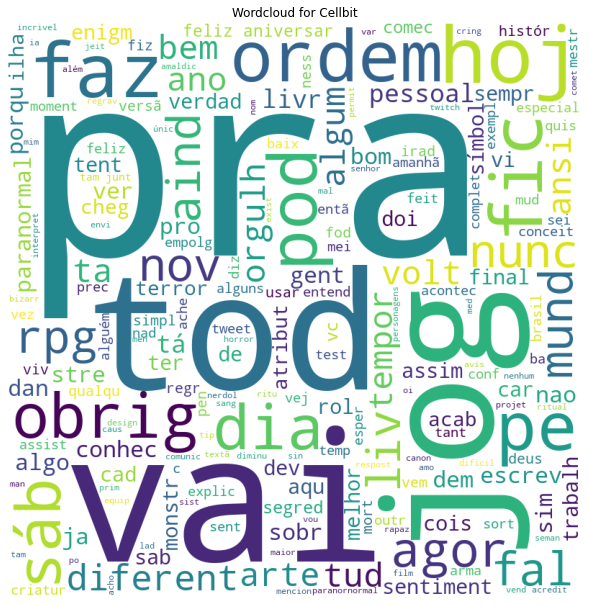

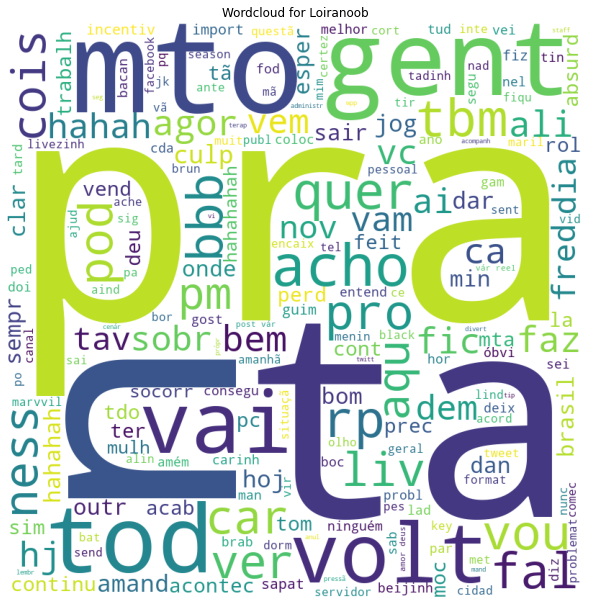

In [40]:
grouped_data = df_influencer_tweets.groupby('userID')

for group_name, group in grouped_data:
    text = ' '.join(group['clean_text'].tolist())
    preprocessed_text = preprocess_text(text)
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(preprocessed_text)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(f"Wordcloud for {group_name}")
    plt.show()


# 2.5 Verificacao das palavras mais utilizadas

In [41]:
def get_top_words(group_text, n=10, min_length=4):
    # Tokenize the text
    tokens = word_tokenize(group_text)
    
    # Remove stopwords
    stopwords_list = stopwords.words('portuguese')
    tokens = [token for token in tokens if token not in stopwords_list]
    
    # Lemmatize the tokens
    stemmer = RSLPStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Filter out words with length less than min_length
    tokens = [token for token in tokens if len(token) >= min_length]
    
    # Count the frequency of each word
    word_freq = nltk.FreqDist(tokens)
    
    # Get the n most common words
    top_words = word_freq.most_common(n)
    
    return top_words


grouped_data = df_influencer_tweets.groupby('userID')

for group_name, group in grouped_data:
    text = ' '.join(group['full_text'].tolist())
    preprocessed_text = preprocess_text(text)
    top_words = get_top_words(preprocessed_text, n=10)
    print(f"Top 10 words for {group_name}:")
    for word, freq in top_words:
        print(f"{word}: {freq}")
    # wordcloud = WordCloud(width=800, height=800, background_color='white').generate(preprocessed_text)
    # plt.figure(figsize=(8, 8), facecolor=None)
    # plt.imshow(wordcloud)
    # plt.axis("off")
    # plt.tight_layout(pad=0)
    # plt.title(f"Wordcloud for {group_name}")
    # plt.show()

Top 10 words for BRKsEDU:
obrig: 12
nint: 9
hahah: 9
aind: 8
gent: 8
deix: 7
assim: 7
gost: 7
curt: 6
espec: 6
Top 10 words for Cellbit:
temp: 9
algum: 9
pess: 8
obrig: 8
nunc: 7
mund: 7
aind: 7
diferent: 7
feliz: 7
ansi: 6
Top 10 words for Loiranoob:
gent: 20
volt: 14
coil: 11
sobr: 9
hahah: 9
fred: 8
culp: 8
amand: 7
outr: 6
sempr: 6


# 2.6 Bigramas mais comuns nos textos

In [42]:
def get_collocations(group_text, n=5, min_length=4):
    # Tokenize the text
    tokens = word_tokenize(group_text.lower())
    
    
    # Remove stopwords
    stopwords_list = stopwords.words('portuguese')
    tokens = [token for token in tokens if token not in stopwords_list]
    
    # Lemmatize the tokens
    stemmer = RSLPStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Filter out words with length less than min_length
    tokens = [token for token in tokens if len(token) >= min_length]
    
    # Get the most common bigrams and trigrams
    bigram_measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokens)
    finder.apply_freq_filter(2)
    bigrams = finder.nbest(bigram_measures.raw_freq, n)
    
    trigram_measures = TrigramAssocMeasures()
    finder = TrigramCollocationFinder.from_words(tokens)
    finder.apply_freq_filter(2)
    trigrams = finder.nbest(trigram_measures.raw_freq, n)
    
    return bigrams, trigrams

In [50]:
grouped_data= df_influencer_tweets.groupby('userID')

for group_name, group in grouped_data:
    print(group_name)
    text = ' '.join(group['full_text'].tolist())
    preprocessed_text = preprocess_text(text)
    bigrams, trigrams = get_collocations(preprocessed_text, n=5, min_length=3)
    print(f"===== Top 5 bigrams for {group_name}:")
    for bigram in bigrams:
        print(' '.join(bigram))
    print()
    print(f"==== Top 5 trigrams for {group_name}:")
    for trigram in trigrams:
        print(' '.join(trigram))
    print("============")



BRKsEDU
===== Top 5 bigrams for BRKsEDU:
lik dragon
nunc viu
resident evil
víd nov
dragon ishin

==== Top 5 trigrams for BRKsEDU:
lik dragon ishin
bol pequen áre
jog deu marroc
jog hogwart legacy
ori and the
Cellbit
===== Top 5 bigrams for Cellbit:
ansi pra
feliz aniversar
tod mund
liv hoj
ord paranorm

==== Top 5 trigrams for Cellbit:
ansi pra jog
liv hoj porqu
Loiranoob
===== Top 5 bigrams for Loiranoob:
post vár
pra dar
pra ver
vár reel
ach bacan

==== Top 5 trigrams for Loiranoob:
post vár reel
ach bem problemát
bem problemát tbm
coil anul outr
tbm ach problemat


## Encontrando os tweets que utilizam os bigramas mais comuns

In [51]:
from nltk import ngrams
from collections import Counter

# Criar uma lista de bigramas para cada userID
bigrams_by_user = {}
for user in df_influencer_tweets['userID'].unique():
    user_tweets = df_influencer_tweets[df_influencer_tweets['userID'] == user]['clean_text']
    user_bigrams = [gram for tweet in user_tweets for gram in ngrams(tweet.split(), 2)]
    bigrams_by_user[user] = Counter(user_bigrams).most_common(10)


In [54]:
bigrams_by_user.keys()

dict_keys(['Cellbit', 'BRKsEDU', 'Loiranoob'])

In [72]:
list_df = []
for userid, bigrams in bigrams_by_user.items():
    # Iterate over the bigrams
    print(userid)
    for bigram, count in bigrams:
        df_tmp = df_influencer_tweets[df_influencer_tweets.userID==userid]
        # Check if the bigram appears in the clean_text column
        df_filtered = df_tmp[df_tmp['clean_text'].str.contains(' '.join(bigram))]
        # Sort the filtered DataFrame by favorite_count in descending order
        df_filtered = df_filtered.sort_values('favorite_count', ascending=False)
        # Select the top 3 tweets with the highest favorite_count
        df_top3 = df_filtered.head(3)
        # Print the bigram and the top 3 tweets
        print(f'Bigram: {bigram}, Count: {count}')
    list_df.append(df_top3[['userID','created_at','clean_text', 'full_text', 'favorite_count']].head())

Cellbit
Bigram: ('ansios', 'pra'), Count: 5
Bigram: ('tod', 'mund'), Count: 4
Bigram: ('feliz', 'aniversari'), Count: 4
Bigram: ('ordem', 'paranormal'), Count: 3
Bigram: ('tam', 'junt'), Count: 3
Bigram: ('liv', 'hoj'), Count: 3
Bigram: ('3', 'ano'), Count: 2
Bigram: ('bom', 'dia'), Count: 2
Bigram: ('dia', 'hoj'), Count: 2
Bigram: ('final', 'livr'), Count: 2
BRKsEDU
Bigram: ('of', 'the'), Count: 6
Bigram: ('lik', 'dragon'), Count: 5
Bigram: ('víd', 'nov'), Count: 4
Bigram: ('nunc', 'viu'), Count: 4
Bigram: ('resident', 'evil'), Count: 4
Bigram: ('pra', 'faz'), Count: 3
Bigram: ('evil', '4'), Count: 3
Bigram: ('public', 'víd'), Count: 3
Bigram: ('the', 'gam'), Count: 3
Bigram: ('dragon', 'ishin'), Count: 3
Loiranoob
Bigram: ('pra', 'dar'), Count: 3
Bigram: ('n', 'tav'), Count: 3
Bigram: ('pra', 'ver'), Count: 3
Bigram: ('quer', 'mto'), Count: 3
Bigram: ('post', 'vári'), Count: 3
Bigram: ('vári', 'reel'), Count: 3
Bigram: ('pc', 'ta'), Count: 3
Bigram: ('amor', 'deus'), Count: 3
Bigram:

In [73]:
list_df[0]

,userID,created_at,clean_text,full_text,favorite_count
39,Cellbit,2022-11-01 16:57:28+00:00,orgulh var cois fiz ver pessoal receb final li...,eu tenho orgulho de varias coisas que fiz\n\nm...,14960
87,Cellbit,2022-08-14 05:14:57+00:00,tod condiçõ tã explic final livr,@RafaelF87263547 @OrdemParanormal todas as con...,1038


In [74]:
list_df[1]

,userID,created_at,clean_text,full_text,favorite_count
205,BRKsEDU,2023-03-03 01:08:08+00:00,vi episódi 1 ache bem frac relaçã jog daí segu...,@jpegtomas Vi o episódio 1 e achei bem fraco e...,352
216,BRKsEDU,2023-02-22 00:21:46+00:00,jog lik dragon ishin aqu jog tá fenomenal cria...,Tenho jogado Like a Dragon Ishin por aqui e o ...,331
206,BRKsEDU,2023-03-01 01:03:05+00:00,aqu viv aparec vou ver desabilit tô capítul 11...,@joga_dan Aqui vive aparecendo isso. Vou ver s...,25


In [75]:
list_df[2]

,userID,created_at,clean_text,full_text,favorite_count
422,Loiranoob,2023-03-21 16:51:21+00:00,instagr lembr faz 4 ano fatíd viag pra rom ond...,O instagram me lembrando que fazem 4 anos da f...,1698
369,Loiranoob,2023-04-17 16:43:39+00:00,deix clar saúd mental pressã cois tip nunc pro...,"Só deixar claro que saúde mental, pressão ou c...",400


In [76]:
list_df_ = []
for userid, bigrams in bigrams_by_user.items():
    # Iterate over the bigrams
    print(userid)
    for bigram, count in bigrams:
        df_tmp = df_influencer_tweets[df_influencer_tweets.userID==userid]
        # Check if the bigram appears in the clean_text column
        df_filtered = df_tmp[df_tmp['clean_text'].str.contains(' '.join(bigram))]
        # Sort the filtered DataFrame by favorite_count in descending order
        df_filtered = df_filtered.sort_values('retweet_count', ascending=False)
        # Select the top 3 tweets with the highest favorite_count
        df_top3 = df_filtered.head(3)
        # Print the bigram and the top 3 tweets
        print(f'Bigram: {bigram}, Count: {count}')
    list_df_.append(df_top3[['userID','created_at','clean_text', 'full_text', 'retweet_count']].head())

Cellbit
Bigram: ('ansios', 'pra'), Count: 5
Bigram: ('tod', 'mund'), Count: 4
Bigram: ('feliz', 'aniversari'), Count: 4
Bigram: ('ordem', 'paranormal'), Count: 3
Bigram: ('tam', 'junt'), Count: 3
Bigram: ('liv', 'hoj'), Count: 3
Bigram: ('3', 'ano'), Count: 2
Bigram: ('bom', 'dia'), Count: 2
Bigram: ('dia', 'hoj'), Count: 2
Bigram: ('final', 'livr'), Count: 2
BRKsEDU
Bigram: ('of', 'the'), Count: 6
Bigram: ('lik', 'dragon'), Count: 5
Bigram: ('víd', 'nov'), Count: 4
Bigram: ('nunc', 'viu'), Count: 4
Bigram: ('resident', 'evil'), Count: 4
Bigram: ('pra', 'faz'), Count: 3
Bigram: ('evil', '4'), Count: 3
Bigram: ('public', 'víd'), Count: 3
Bigram: ('the', 'gam'), Count: 3
Bigram: ('dragon', 'ishin'), Count: 3
Loiranoob
Bigram: ('pra', 'dar'), Count: 3
Bigram: ('n', 'tav'), Count: 3
Bigram: ('pra', 'ver'), Count: 3
Bigram: ('quer', 'mto'), Count: 3
Bigram: ('post', 'vári'), Count: 3
Bigram: ('vári', 'reel'), Count: 3
Bigram: ('pc', 'ta'), Count: 3
Bigram: ('amor', 'deus'), Count: 3
Bigram:

In [77]:
list_df_[0]

,userID,created_at,clean_text,full_text,retweet_count
39,Cellbit,2022-11-01 16:57:28+00:00,orgulh var cois fiz ver pessoal receb final li...,eu tenho orgulho de varias coisas que fiz\n\nm...,980
87,Cellbit,2022-08-14 05:14:57+00:00,tod condiçõ tã explic final livr,@RafaelF87263547 @OrdemParanormal todas as con...,9


In [78]:
list_df_[1]

,userID,created_at,clean_text,full_text,retweet_count
216,BRKsEDU,2023-02-22 00:21:46+00:00,jog lik dragon ishin aqu jog tá fenomenal cria...,Tenho jogado Like a Dragon Ishin por aqui e o ...,5
205,BRKsEDU,2023-03-03 01:08:08+00:00,vi episódi 1 ache bem frac relaçã jog daí segu...,@jpegtomas Vi o episódio 1 e achei bem fraco e...,2
206,BRKsEDU,2023-03-01 01:03:05+00:00,aqu viv aparec vou ver desabilit tô capítul 11...,@joga_dan Aqui vive aparecendo isso. Vou ver s...,0


In [79]:
list_df_[2]

,userID,created_at,clean_text,full_text,retweet_count
422,Loiranoob,2023-03-21 16:51:21+00:00,instagr lembr faz 4 ano fatíd viag pra rom ond...,O instagram me lembrando que fazem 4 anos da f...,11
369,Loiranoob,2023-04-17 16:43:39+00:00,deix clar saúd mental pressã cois tip nunc pro...,"Só deixar claro que saúde mental, pressão ou c...",3
